In [1]:
from s04utils.modules.load.Timestamps import Timestamps
from s04utils.modules.load.BinnedTimestamps import BinnedTimestamps

from s04utils.modules.analyze.dwelltime_analyzer import DwellTimeAnalyzer
from s04utils.modules.analyze.dwelltime_analyzer_v2 import DwelltimeAnalyzer

from matplotlib import pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats


In [2]:
# Set quality for plt plots
set_matplotlib_formats('retina')

In [3]:
# set path to data files folder
SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/23_08_07/77K-16nM-eGFP-vitrified/10uW/timestamps/tt_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_037.h5'
#SOURCE_PATH = '/Users/kappel/Messungen/Setup04/JaKa/23_08_07/77K-16nM-eGFP-vitrified/10uW/timestamps/tt_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_018.h5'

In [4]:
timestamps = Timestamps(SOURCE_PATH)

In [5]:
timestamps_binned = BinnedTimestamps(SOURCE_PATH, bin_width=0.01)

In [6]:
comment = timestamps.h5_content['comment'][()].decode('utf-8')
print(comment)

# parse the comment
comment = comment.split('\n')
print(comment)

# strip spaces from the comment
comment = [line.strip() for line in comment]
print(comment)

# create dictionary from comment
# first line is the first key, the rest is the value
comment_dict = {comment[0]: comment[1:]}



print(comment_dict)

cursor position:
  x: 1,098478E-4 m
  y: 9,394756E-5 m
['cursor position:', '  x: 1,098478E-4 m', '  y: 9,394756E-5 m']
['cursor position:', 'x: 1,098478E-4 m', 'y: 9,394756E-5 m']
{'cursor position:': ['x: 1,098478E-4 m', 'y: 9,394756E-5 m']}


In [7]:
analyzer = DwellTimeAnalyzer(timestamps_binned, min_states=2, max_states=2)

Energy detector_0: 451005
Energy detector_1: 1165971


* how many steps found in signal?
* use optimal number of steps or a fixed number of steps?

In [8]:
dwell_times = analyzer.dwell_times

* which detector signal should be used for the steps analysis?
* choose the best detector signal for the steps analysis
* get dwell time from the chosen detector signal

In [9]:
for detector in dwell_times.keys():
    print(detector)
    for state in dwell_times[detector].keys():
        print(state, dwell_times[detector][state])

detector_0
10 [1009]
12 [1005]
detector_1
7 [   4   13    1    0    0    6    0    1    1    2    5    6    8    7
    0    5    1    4    2    2    0    2    3    5    1    5    0    1
    0    8    0   12    1    3    5    3    4    2    1    3   11    4
    3    0    4    5    3    5    2    1    0   12    3    5    0    3
    1    5    2    3    5    2    0    1    7    3    2    0    2    0
    0    2    7   13    1   10    3    2    0    2    3    5   13    2
    0    0    3    3    2    5    2    3    7    1    5    0    4    0
    0    1    2    3    1    2    0    3    4    3    2    5    1    5
    7    4    7    8    1    4    0    0    1    9    0    4    9    4
    1    0    0    2    3    1    5    0    3    1   16    2    2    3
    3    0    2    6    4    9    0    7    0    0    0    6   15    3
    1    1    6    5    0    6    4    2    1    2    1    2    1    7
    7    3    3    1    1    2    4    1    6    6    1   10    3    3
    0    6    3   11    0    0   

* plot the chosen detector signal and the steps found
* plot the chosen detector signal and the steps found with the dwell time

* plot the dwell time histogram

In [10]:
best_detector = analyzer.get_best_detector(timestamps_binned)
print(best_detector)

Energy detector_0: 451005
Energy detector_1: 1165971
detector_1


In [11]:
dta = DwelltimeAnalyzer()

dta.load_data(timestamps_binned)
dta.set_detector('auto')
print(dta.signal)

Detector selection:
-------------------
Energy detector_0:  451005
Energy detector_1:  1165971
detector_1 selected
-------------------
[10  8  4 ... 10  6  8]


In [12]:
dta.set_analysis_method('sfHMM')

In [13]:
dta.get_last_state_change()

In [14]:
dta.get_opt_num_states()

Optimal number of states:  4


In [15]:
dta.trim_signal()
dta.fit_sfHMM()

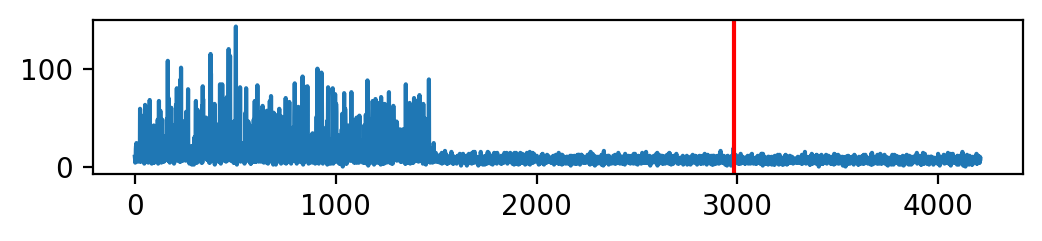

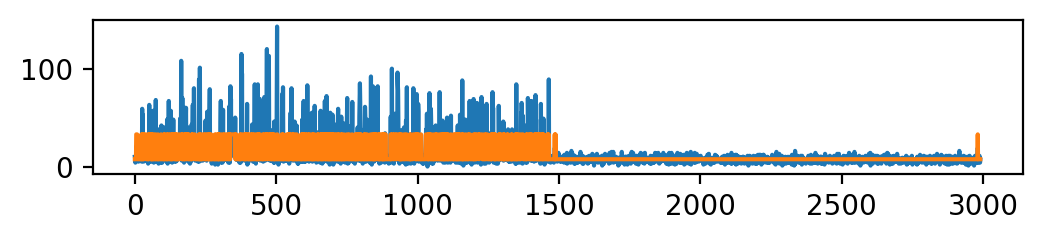

In [16]:

plt.figure(figsize=(6, 1))
plt.plot(dta.signal)
plt.axvline(x=dta.last_state_change, color='r')
plt.show()

plt.figure(figsize=(6, 1))
plt.plot(dta.signal_trimmed)
plt.plot(dta.viterbi_path)
plt.show()

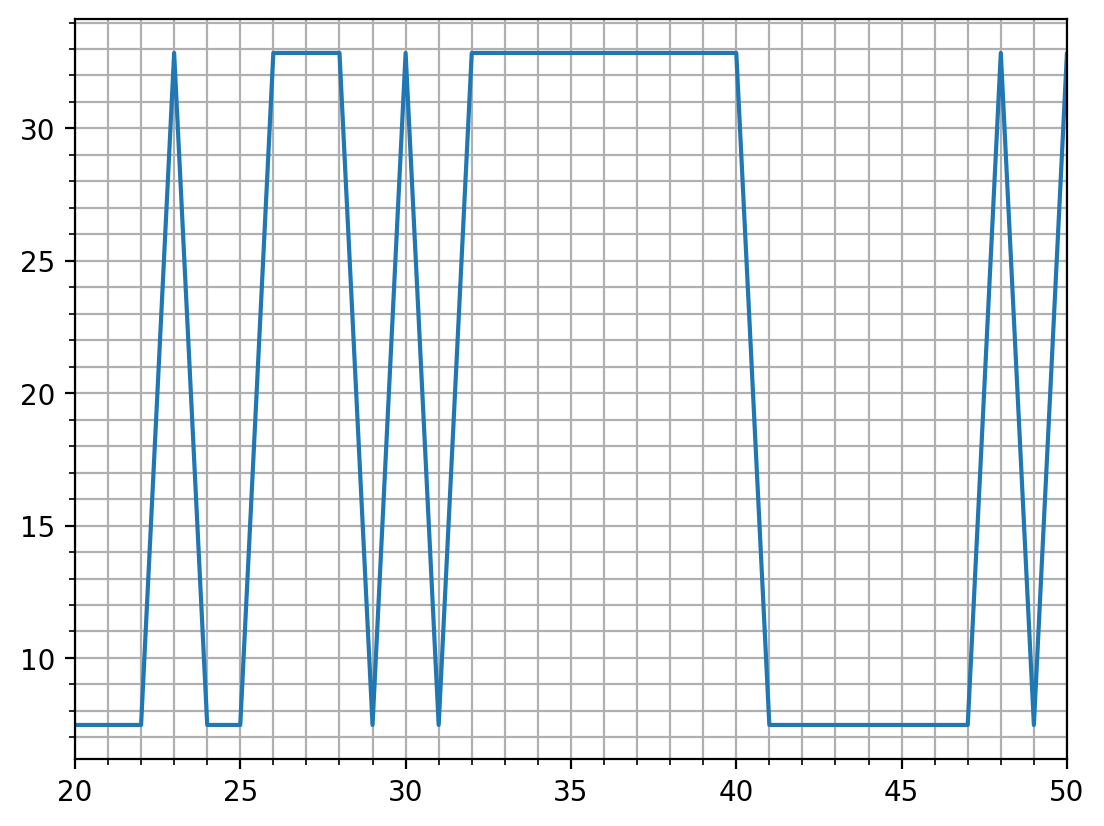

enter indices:[   5   19   21   22   23   30   31   33   35   38   44   51   60   68
   69   75   77   82   85   88   89   92   96  102  104  110  111  113
  114  123  124  137  139  143  149  153  158  161  163  167  179  184
  188  189  194  200  204  210  213  215  216  229  233  239  240  244
  246  252  255  259  265  268  269  271  279  283  286  287  290  291
  292  295  303  317  319  330  334  337  338  341  345  351  365  368
  369  370  374  378  381  387  390  394  402  404  410  411  416  417
  418  420  423  427  429  432  433  437  442  446  449  455  457  463
  471  476  484  493  495  500  501  502  504  514  515  520  530  535
  537  538  539  542  546  548  554  555  559  561  578  581  584  588
  592  593  596  603  608  618  619  627  628  629  630  637  653  657
  659  661  668  674  675  682  687  690  692  695  697  700  702  710
  718  722  726  728  730  733  738  740  747  754  756  767  771  775
  776  783  787  799  800  801  804  806  817  818  819  826  8

In [17]:
dta.get_dwell_times()

print(dta.dwelltimes)

In [18]:
#dta.analyze(analysis_method='sfHMM', detector_selection='auto')

In [19]:
dta.rename_dwell_time_states()

print(dta.dwelltimes)

{'off': array([   5,   14,    2,    1,    1,    7,    1,    2,    2,    3,    6,
          7,    9,    8,    1,    6,    2,    5,    3,    3,    1,    3,
          4,    6,    2,    6,    1,    2,    1,    9,    1,   13,    2,
          4,    6,    4,    5,    3,    2,    4,   12,    5,    4,    1,
          5,    6,    4,    6,    3,    2,    1,   13,    4,    6,    1,
          4,    2,    6,    3,    4,    6,    3,    1,    2,    8,    4,
          3,    1,    3,    1,    1,    3,    8,   14,    2,   11,    4,
          3,    1,    3,    4,    6,   14,    3,    1,    1,    4,    4,
          3,    6,    3,    4,    8,    2,    6,    1,    5,    1,    1,
          2,    3,    4,    2,    3,    1,    4,    5,    4,    3,    6,
          2,    6,    8,    5,    8,    9,    2,    5,    1,    1,    2,
         10,    1,    5,   10,    5,    2,    1,    1,    3,    4,    2,
          6,    1,    4,    2,   17,    3,    3,    4,    4,    1,    3,
          7,    5,   10,    1,    8,    1, 